# Creating stencils for arbitrary offsets

By default, findiff creates representations of differential operations without giving the
explicit form of the stencil, i.e. which grid points around a given evaluation point
you want to use. Normally, you just say what differential operator you want and what
accuracy. This approach will use a set of stencils which are symmetric in the interior
of the grid and one-sided near the boundaries. However, sometimes you want to specify
which points to use, explicitely. For example, you may want to calculate a derivative
using an asymmetric distribution of points. In that case, generic stencils are the way
to go in *findiff*. This feature has been implemented as of version 0.9.0.


## The `partials` dictionary

In the stencils module, we define linear differential operators as Python dictionaries.

Each key of the dictionary is a tuple, say `(2, 0)`. This means we have a 2D grid (length of the tuple is 2)
and along the zeroth axis, we take the second derivative. Along the 1-axis, we take zeroth derivative (do nothing):

$$
\frac{\partial^2}{\partial x_0^2}
$$

Accordingly, `(2, 1, 1)` would mean we have a 3D grid, with second partial derivative along axis 0, first
partial derivative along axis 1 and first partial derivative along axis 2:

$$
\frac{\partial^4}{\partial x_0^2\partial x_1 \partial x_2}
$$

The values of each item in the dictionary give the weight of the derivative, so

```
(2, 0): 4
```

means we have the term

$$
4 \frac{\partial^2}{\partial x_0^2}
$$

Finally, the dictionary implies a sum over all items, so

```
{
 (2, 0): 1,
 (0, 2): 2
}
```

means

$$
\frac{\partial^2}{\partial x_0^2} + 2 \frac{\partial^2}{\partial x_1^2}
$$

## Example 1: Stencil for 2D Laplacian using 5-points

In [1]:
from findiff.stencils import Stencil

# Which points (given as offsets) to use:
offsets = [(0, 0), (1, 0), (-1, 0), (0, 1), (0, -1)]

# For the partials argument, see the section above
stencil = Stencil(offsets, partials={(2, 0): 1, (0, 2): 1}, spacings=(1, 1))
stencil.values

{(0, 0): np.float64(-4.0),
 (1, 0): np.float64(1.0),
 (-1, 0): np.float64(1.0),
 (0, 1): np.float64(1.0),
 (0, -1): np.float64(1.0)}

In [2]:
from itertools import product

offsets = list(product([-1, 0, 1], repeat=2))
offsets

[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]

In [3]:
# For the partials argument, see the section above
stencil = Stencil(offsets, partials={(2, 0): 1, (0, 2): 1}, spacings=(1, 1))
stencil.values

{(-1, 0): np.float64(1.0),
 (0, -1): np.float64(1.0),
 (0, 0): np.float64(-4.0),
 (0, 1): np.float64(1.0),
 (1, 0): np.float64(1.0)}

In [4]:
offsets = [(0, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]
stencil = Stencil(offsets, partials={(2, 0): 1, (0, 2): 1}, spacings=(1, 1))
stencil.values, stencil.accuracy

({(0, 0): np.float64(-2.0),
  (1, 1): np.float64(0.5),
  (-1, -1): np.float64(0.5),
  (1, -1): np.float64(0.5),
  (-1, 1): np.float64(0.5)},
 2)

In [5]:
offsets = list(product([-1, 0, 1], repeat=2))
stencil = Stencil(offsets, partials={(1, 1): 1}, spacings=(1, 1))
stencil.values, stencil.accuracy

({(-1, -1): np.float64(0.25),
  (-1, 1): np.float64(-0.25),
  (1, -1): np.float64(-0.25),
  (1, 1): np.float64(0.25)},
 2)

In [6]:
offsets = list(range(-4, 5))
stencil = Stencil(offsets, partials={(2,): 1}, spacings=(1,))
stencil.values, stencil.accuracy

({(-4,): np.float64(-0.0017857142857142828),
  (-3,): np.float64(0.02539682539682533),
  (-2,): np.float64(-0.19999999999999918),
  (-1,): np.float64(1.5999999999999954),
  (0,): np.float64(-2.8472222222222148),
  (1,): np.float64(1.5999999999999956),
  (2,): np.float64(-0.19999999999999915),
  (3,): np.float64(0.025396825396825296),
  (4,): np.float64(-0.0017857142857142785)},
 8)

9-point stencil

In [7]:
from itertools import product

offsets = list(product([-1, 0, 1], repeat=2))
offsets

[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]

In [10]:
# For the partials argument, see the section above
stencil = Stencil(offsets, partials={(2, 0): 1, (0, 2): 1}, spacings=(1, 1))
stencil.values, stencil.accuracy

({(-1, 0): np.float64(1.0),
  (0, -1): np.float64(1.0),
  (0, 0): np.float64(-4.0),
  (0, 1): np.float64(1.0),
  (1, 0): np.float64(1.0)},
 2)

In [11]:
from findiff import Diff

In [ ]:
import numpy as np
from findiff import FinDiff

# define the grid:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y, indexing='ij')

# Define the derivative:
laplacian = FinDiff(0, x[1] - x[0], 2) + FinDiff(1, y[1] - y[0], 2)
mat = laplacian.matrix((10,10))  # this method returns a scipy sparse matrix
print(mat.toarray())

[[ 3.92040000e+04 -4.90050000e+04  3.92040000e+04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.80100000e+03  0.00000000e+00  9.80100000e+03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  9.80100000e+03  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.09139364e-11
   9.80100000e+03  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.80100000e+03
   1.09139364e-11  9.80100000e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.92040000e+04
  -4.90050000e+04  3.92040000e+04]]


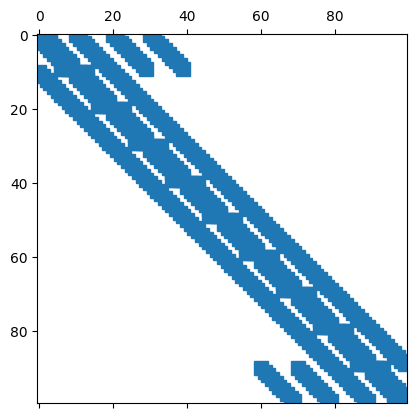

In [25]:
import matplotlib.pyplot as plt

plt.spy(mat)
plt.show()

In [27]:
laplacian.stencil((10,10))

{('L', 'L'): {(np.int64(0), np.int64(0)): np.float64(39203.99999999999), (np.int64(0), np.int64(1)): np.float64(-49004.99999999999), (np.int64(0), np.int64(2)): np.float64(39203.99999999999), (np.int64(0), np.int64(3)): np.float64(-9800.999999999998), (np.int64(1), np.int64(0)): np.float64(-49004.99999999999), (np.int64(2), np.int64(0)): np.float64(39203.99999999999), (np.int64(3), np.int64(0)): np.float64(-9800.999999999998)}, ('L', 'C'): {(np.int64(0), np.int64(-1)): np.float64(9800.999999999998), (np.int64(0), np.int64(1)): np.float64(9800.999999999998), (np.int64(1), np.int64(0)): np.float64(-49004.99999999999), (np.int64(2), np.int64(0)): np.float64(39203.99999999999), (np.int64(3), np.int64(0)): np.float64(-9800.999999999998)}, ('L', 'H'): {(np.int64(0), np.int64(-3)): np.float64(-9800.999999999998), (np.int64(0), np.int64(-2)): np.float64(39203.99999999999), (np.int64(0), np.int64(-1)): np.float64(-49005.0), (np.int64(0), np.int64(0)): np.float64(39204.0), (np.int64(1), np.int64